In [1]:
import os
import sys
import cv2

import matplotlib.pyplot as plt
import torch
from omegaconf import OmegaConf, DictConfig, ListConfig

sys.path.append('../../')

from torchok.constructor.config_structure import DatasetParams
from torchok.constructor.constructor import Constructor

/opt/conda/envs/torchok/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_params = {
    'data_folder': '/workdir/rbayazitov/detection/',
    'train': True,
    'download': True,
}

transform = ListConfig([
    DictConfig({
        'name': 'Resize',
        'params': {
            'width': 224,
            'height': 224
        }
    }),
    DictConfig({
        'name': 'ToTensorV2',
        'params': {
        }
    })
    
    ]
)


dataset_params = DictConfig({
    'name': 'COCODetection', 
    'params': data_params, 
    'transform' :transform})

dataset = Constructor._create_dataset(dataset_params)
dataset

100%|██████████| 19336861798/19336861798 [14:38<00:00, 22015849.77it/s]


Extracting /workdir/rbayazitov/detection/COCO/train2017.zip to /workdir/rbayazitov/detection/COCO


100%|██████████| 815585330/815585330 [00:34<00:00, 23344513.44it/s]


Extracting /workdir/rbayazitov/detection/COCO/valid2017.zip to /workdir/rbayazitov/detection/COCO


100%|██████████| 252907541/252907541 [00:11<00:00, 22899485.16it/s]


Extracting /workdir/rbayazitov/detection/COCO/annotations.zip to /workdir/rbayazitov/detection/COCO


/opt/conda/envs/torchok/lib/python3.9/site-packages/albumentations/core/composition.py:53: UserWarning: transforms is single transform, but a sequence is expected! Transform will be wrapped into list.
  warnings.warn(


In [3]:
dataset[0]

{'image': tensor([[[255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          ...,
          [141., 192., 195.,  ...,  76.,  66.,  79.],
          [134., 180., 173.,  ...,  88.,  82.,  55.],
          [183., 214., 216.,  ...,  44.,  73.,  61.]],
 
         [[255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          ...,
          [106., 178., 167.,  ...,  76.,  56.,  85.],
          [ 89., 148., 135.,  ...,  86.,  79.,  60.],
          [158., 191., 188.,  ...,  41.,  96.,  77.]],
 
         [[255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          ...,
          [ 83., 139., 130.,  ...,  26.,  30.,  50.],
          [ 70., 115., 105.,  ...,  50.,  39.,  25.],
          [114., 136.,

In [6]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    print(x_min, x_max, y_min, y_max)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = str(category_id_to_name[category_id])
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

246 372 113 495
224 284 295 389
83 286 32 536
267 480 79 201


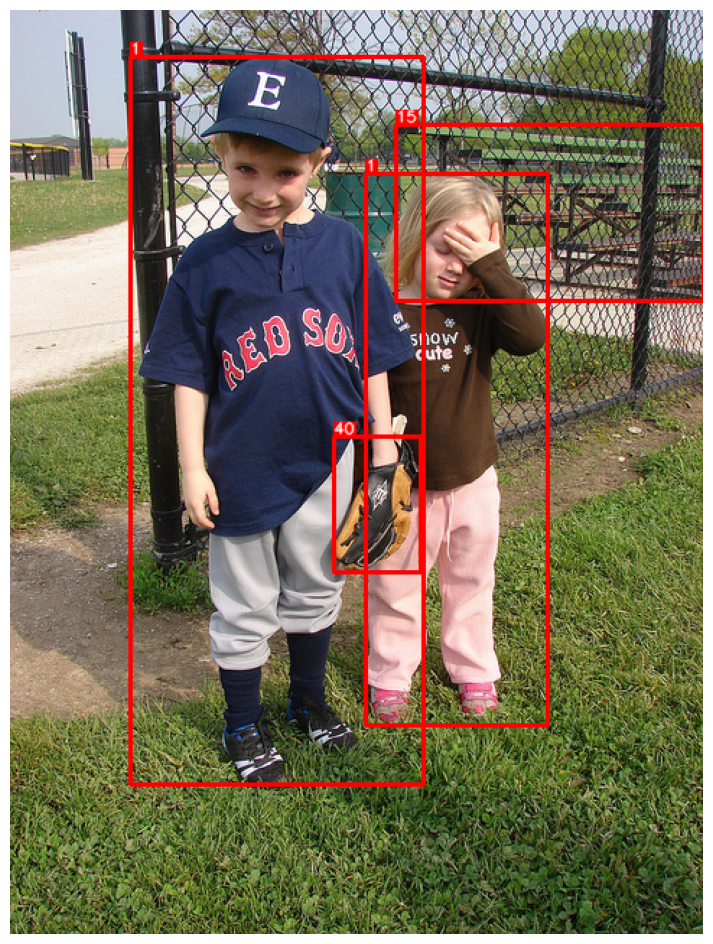

In [8]:
n = 512
sample = dataset.get_raw(n)
category_id_to_name = dict(zip(sample['label'], sample['label']))
visualize(sample['image'], sample['bboxes'], sample['label'], category_id_to_name)

In [5]:
data_params = {
    'data_folder': '/workdir/rbayazitov/detection/val2017/',
    'csv_path': '/workdir/rbayazitov/detection/valid.csv'
}

transform = ListConfig([
    DictConfig({
        'name': 'Resize',
        'params': {
            'width': 224,
            'height': 224
        }
    }),
    DictConfig({
        'name': 'ToTensorV2',
        'params': {
        }
    })
    
    ]
)

daset_params = {
    'name': 'DetectionDataset',
    'params': data_params,
    'transform': transform
}

dataset_params = DatasetParams(name='DetectionDataset', params=data_params, transform=[transform])

dataset = Constructor._create_dataset(DictConfig(daset_params))
dataset

/opt/conda/envs/torchok/lib/python3.9/site-packages/albumentations/core/composition.py:53: UserWarning: transforms is single transform, but a sequence is expected! Transform will be wrapped into list.
  warnings.warn(


In [6]:
dataset[0]

{'image': tensor([[[120., 103.,  77.,  ...,  13.,  13.,  10.],
          [123.,  92.,  82.,  ...,  10.,  15.,  42.],
          [120., 100.,  73.,  ...,  14.,  14.,  23.],
          ...,
          [136., 141., 143.,  ...,  49.,  53.,  51.],
          [141., 138., 141.,  ...,  49.,  51.,  49.],
          [143., 141., 142.,  ...,  51.,  52.,  50.]],
 
         [[130., 116.,  86.,  ...,   6.,  14.,  10.],
          [135., 104.,  86.,  ...,  13.,  14.,  41.],
          [136., 102.,  78.,  ...,  16.,  12.,  26.],
          ...,
          [107., 106., 110.,  ...,  37.,  38.,  37.],
          [106., 107., 107.,  ...,  37.,  36.,  33.],
          [109., 108., 109.,  ...,  37.,  36.,  32.]],
 
         [[ 68.,  63.,  68.,  ...,  11.,  12.,  11.],
          [ 72.,  53.,  84.,  ...,  10.,  13.,  39.],
          [ 69.,  56.,  57.,  ...,  14.,  13.,  23.],
          ...,
          [ 77.,  78.,  78.,  ...,  23.,  27.,  26.],
          [ 78.,  76.,  77.,  ...,  27.,  26.,  25.],
          [ 75.,  74.,

In [10]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    print(x_min, x_max, y_min, y_max)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = str(category_id_to_name[category_id])
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(224, 224, 3)
76 89 126 156
0 121 126 224
136 174 36 182
47 55 130 145
10 34 180 201
20 47 150 172
0 67 86 137
0 21 137 157
41 50 142 160
49 60 140 159
54 63 88 97
55 61 59 68
34 38 159 162
58 61 134 144
30 38 154 160
24 27 155 157
0 66 110 162
33 36 155 158
174 216 106 121


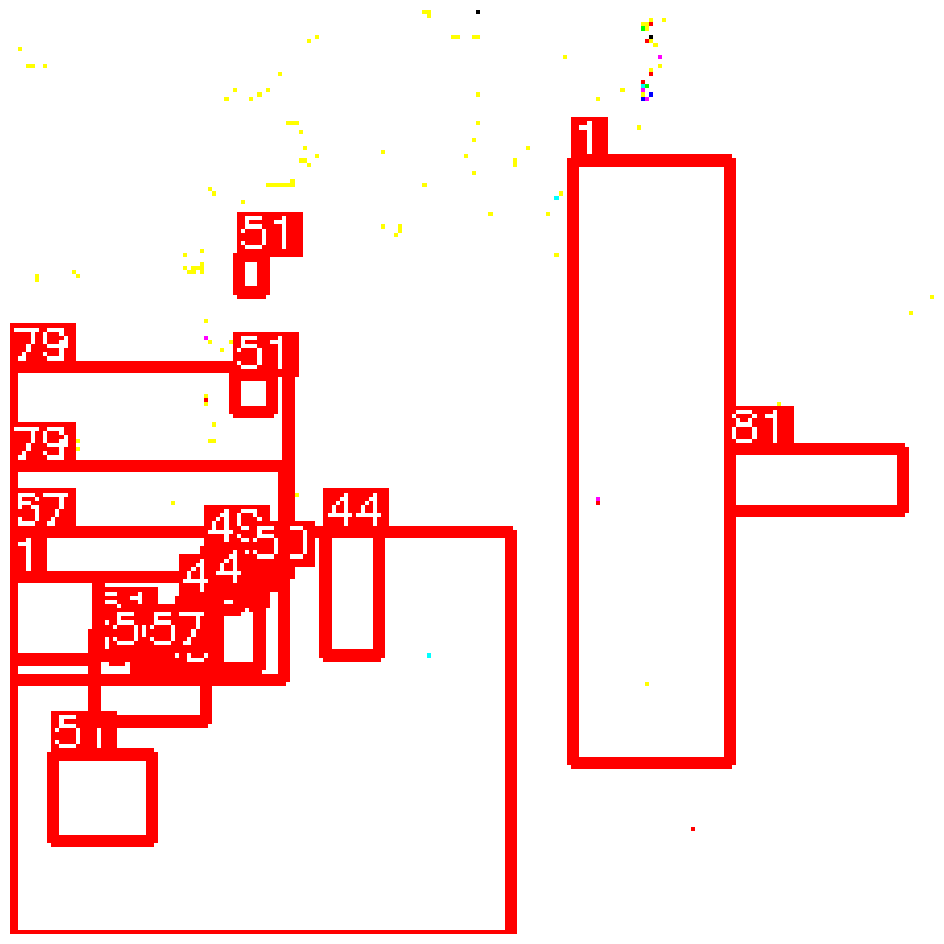

In [15]:
n = 0
data_dict = dataset[n]
category_id_to_name = dict(zip(data_dict['label'].numpy().tolist(), data_dict['label'].numpy().tolist()))

image = data_dict['image'].numpy().transpose(2, 1, 0)
print(image.shape)
visualize(image, data_dict['bboxes'].numpy(), data_dict['label'].numpy(), category_id_to_name)

217 256 240 298
1 347 240 427
388 498 69 347
135 157 249 278
31 99 344 384
59 135 287 328
1 193 164 262
0 62 262 299
119 144 272 306
141 173 267 303
155 182 168 186
157 175 114 129
98 109 304 310
166 174 256 274
86 110 293 305
70 79 296 300
0 191 210 309
96 104 297 301
497 619 203 232


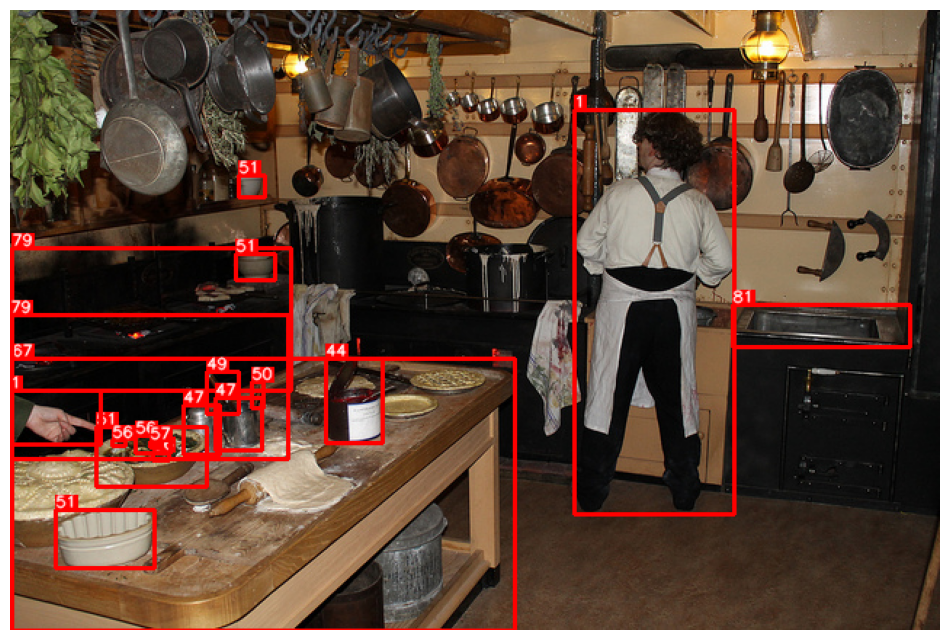

In [16]:
sample = dataset.get_raw(n)
category_id_to_name = dict(zip(sample['label'], sample['label']))
visualize(sample['image'], sample['bboxes'], sample['label'], category_id_to_name)

In [18]:
sample.keys()

dict_keys(['image', 'index', 'label', 'bboxes'])

In [19]:
sample['bboxes']

[[217.62, 240.54, 38.99, 57.75],
 [1.0, 240.24, 346.63, 186.76],
 [388.66, 69.92, 109.41, 277.62],
 [135.57, 249.43, 22.32, 28.79],
 [31.28, 344.0, 68.12, 40.83],
 [59.63, 287.36, 76.07, 41.3],
 [1.36, 164.33, 192.56, 98.37],
 [0.0, 262.81, 62.16, 36.77],
 [119.4, 272.51, 24.82, 34.25],
 [141.47, 267.91, 32.19, 35.86],
 [155.97, 168.95, 26.03, 17.13],
 [157.2, 114.15, 17.86, 15.82],
 [98.75, 304.78, 10.78, 5.57],
 [166.03, 256.36, 8.82, 18.58],
 [86.41, 293.97, 23.96, 11.18],
 [70.14, 296.16, 9.28, 4.58],
 [0.0, 210.9, 191.36, 98.98],
 [96.69, 297.09, 7.84, 4.86],
 [497.25, 203.4, 122.01, 28.61]]

In [20]:
sample['label']

[44, 67, 1, 49, 51, 51, 79, 1, 47, 47, 51, 51, 56, 50, 56, 56, 79, 57, 81]

In [24]:
from torchvision.datasets.utils import download_and_extract_archive

url = 'http://images.cocodataset.org/annotations/annotations_trainval2017.zip'

download_and_extract_archive(url, '/workdir/rbayazitov/detection/',
                             filename='annot.zip', md5='f4bbac642086de4f52a3fdda2de5fa2c')

100%|██████████| 252907541/252907541 [00:11<00:00, 22651694.59it/s]


Extracting /workdir/rbayazitov/detection/annot.zip to /workdir/rbayazitov/detection/
